<h3>ML4DS Lab: week 1: Simple linear regression lab</h3>

#### Aims 

* Do a simple linear regression on the Olympic 100~m data in Python
* Practise numpy, matplotlib, and sklearn


#### Tasks 
* Download the data (‘olympic100m.txt’) from the Moodle page
* Plot Olympic year against winning time
* Plot the loss function in 1D and 2D
* Fit a model with sklearn functions 
* Fit a model with using provided expressions to compute $w_0$ and $w_1$. 
* Create a new plot that includes the data and the function defined by $w_0$ and $w_1$
* Make a prediction at 2012

#### Task 1: Download and import the olympic data

In [19]:
import numpy as np 

data = np.loadtxt('olympic100m.txt', delimiter=',') # load olympic data
data

array([[1896.  ,   12.  ],
       [1900.  ,   11.  ],
       [1904.  ,   11.  ],
       [1906.  ,   11.2 ],
       [1908.  ,   10.8 ],
       [1912.  ,   10.8 ],
       [1920.  ,   10.8 ],
       [1924.  ,   10.6 ],
       [1928.  ,   10.8 ],
       [1932.  ,   10.3 ],
       [1936.  ,   10.3 ],
       [1948.  ,   10.3 ],
       [1952.  ,   10.4 ],
       [1956.  ,   10.5 ],
       [1960.  ,   10.2 ],
       [1964.  ,   10.  ],
       [1968.  ,    9.95],
       [1972.  ,   10.14],
       [1976.  ,   10.06],
       [1980.  ,   10.25],
       [1984.  ,    9.99],
       [1988.  ,    9.92],
       [1992.  ,    9.96],
       [1996.  ,    9.84],
       [2000.  ,    9.87],
       [2004.  ,    9.85],
       [2008.  ,    9.69]])

#### Task 2: Plot the data

Text(0, 0.5, 'Time (seconds)')

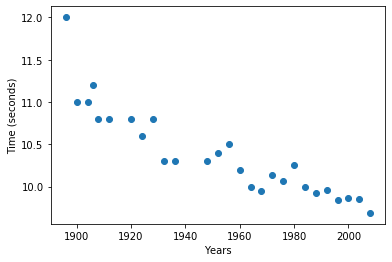

In [20]:
%matplotlib inline
import pylab as plt
x = data[:,0]
t = data[:,1]
plt.scatter(x,t) # draw a scatter plot
plt.xlabel('Years') # always label x&y-axis
plt.ylabel('Time (seconds)') # always label x&y-axis

#### Task 3. Fit a straightline using `LinearRegression` in `sklean`. Plot the model with the data and prediction at 2012.


In [21]:
from sklearn.linear_model import LinearRegression # import 

x = x[:,None] # 27 x 1 array
t = t[:,None] # 27 x 1 array

print(t.shape)
reg = LinearRegression().fit(x, t)
print([reg.intercept_, reg.coef_])

(27, 1)
[array([36.4164559]), array([[-0.01333089]])]


Text(0, 0.5, 'Time (seconds)')

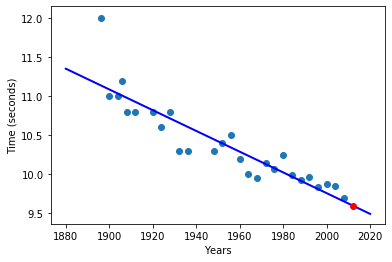

In [18]:
x_test = np.linspace(1880,2020, 100) # generate new x to plot the fitted line. Note better not to use the original x !
plt.plot(x_test,reg.predict(x_test[:,None]),'b-',linewidth=2) # plot the fitted data

plt.plot(2012,reg.predict(np.array([[2012]])),'ro') # plot the fitted data
plt.scatter(x,t) # draw a scatter plot
plt.xlabel('Years') # always label x&y-axis
plt.ylabel('Time (seconds)') # always label x&y-axis

#### Task 5: Fit the model with the Least Square solution. Plot the model with the data and prediction at 2012.

Let's fit a model with an analytical solution to the problem of finding the parameters with the minimum average loss. 

Recall that the average loss is $$  L(w_0, w_1) = \frac{1}{N}\sum_{n=1}^N (t_n - w_0 - w_1x_n)^2 $$
$L$ is a function of $w_0$ and $w_1$. All $x_n$ and $t_n$ are given.  

The procedure to find the analytical expression of the optimal parameters is the following:

- Solving $$\frac{\partial L(w_0, w_1)}{\partial w_0} = 0, \quad \frac{\partial L(w_0, w_1)}{\partial w_1} = 0 $$ 
- the average loss is minimised:
$$ w_1 = \frac{\bar{x}\bar{t} - \bar{xt}}{\bar{x}\bar{x} - \bar{x^2}} $$
and
$$ w_0 = \bar{t} - w_1\bar{x} $$
where $\bar{z} = \frac{1}{N}\sum_{n=1}^N z_n$.

You are encouraged to derive these yourself

In [6]:
xbar = x.mean() 
tbar = t.mean()
xxbar = np.multiply(x,x).mean()
xtbar = np.multiply(x,t).mean()
print(xbar)
print(tbar)
print(xxbar)
print(xtbar)

1952.3703703703704
10.389629629629631
3812975.5555555555
20268.06814814815


In [7]:
w1 = (tbar*xbar - xtbar)/(xbar*xbar - xxbar)
w0 = tbar-w1*xbar
print(w0)
print(w1)

36.41645590250286
-0.013330885710960602


Text(0, 0.5, 'Time (seconds)')

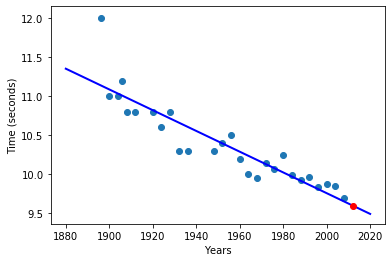

In [8]:
x_test = np.linspace(1880,2020, 100) # generate new x to plot the fitted line. Note better not to use the original x !
plt.plot(x_test,w0+w1*x_test,'b-',linewidth=2) # plot the fitted data

plt.plot(2012,w0+w1*2012,'ro') # plot the fitted data
plt.scatter(x,t) # draw a scatter plot
plt.xlabel('Years') # always label x&y-axis
plt.ylabel('Time (seconds)') # always label x&y-axis